<a href="https://colab.research.google.com/github/Mbacanudo/prediccion_ventas/blob/main/Prediccion_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de ventas

### I.- Análisis Exploratorio

Diccionario de datos para este conjunto de datos:

| Nombre de la variable     | Descripción                                                                                                        |
|---------------------------|--------------------------------------------------------------------------------------------------------------------|
| Item_Identifier           | Identificación única del producto                                                                                  |
| Item_Weight               | Peso del producto                                                                                                  |
| Item_Fat_Content          | Si el producto es bajo en grasa o regular                                                                          |
| Item_Visibility           | Porcentaje de la superficie total de exposición de todos los productos de una tienda asignada al producto concreto |
| Item_Type                 | Categoría a la que el producto pertenece                                                                           |
| Item_MRP                  | Precio máximo de venta al público (precio de catálogo) del producto                                                |
| Outlet_Identifier         | Identificación única de la tienda                                                                                  |
| Outlet_Establishment_Year | El año en que se estableció la tienda                                                                              |
| Outlet_Size               | El tamaño de la tienda en cuanto al área total                                                                     |
| Outlet_Location_Type      | El tipo de área donde se encuentra la tienda                                                                       |
| Outlet_Type               | Si el punto de venta es una tienda de comestibles o algún tipo de supermercado                                     |
| Item_Outlet_Sales         | Ventas del producto en una tienda particular. Es la variable objetivo a predecir.                                  |

#### Manipulación de datos

Importamos los archivos que utilizaremos para realizar una predicción de ventas y revisamos los datos cargados.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
filename = '/content/sales_predictions_2023.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
# Revisamos el tamaño del dataset
df.shape

(8523, 12)

In [29]:
# Vemos los tipos de datos de las columnas
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [30]:
# Comprobamos si existen duplicados
df.duplicated().sum()

0

In [31]:
# Revisamos la cantidad de filas totales e identificamos las columnas que tienen menos valores comparados con el total de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [32]:
# Observamos la cantidad de valores NaN por cada columna
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [33]:
# En el caso del peso de cada item, al no ser tan relevante para nuestro análisis de predicción de ventas reemplazaremos los valores faltantes por el promedio de todos los productos
df["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace=True)

In [34]:
# En el caso de los datos faltantes para la columna de "Outlet_Size" seran reemplazados y se indicaran como dato faltante o "Missing Value".
# De cualquier forma por el momento no se considera relevante esta columna para el análisis.
df['Outlet_Size'].fillna("Missing Value", inplace=True)

In [35]:
# Una vez reemplazados los valores revisaremos el dataset para ver que los cambios se encuentren OK
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [36]:
# Comprobamos los tipos de datos para realizar un análisis general de estadísticas resumidas para cada columna
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [37]:
df[["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year","Item_Outlet_Sales"]].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Conclusiones Intermedias**:

#### Visualizaciones

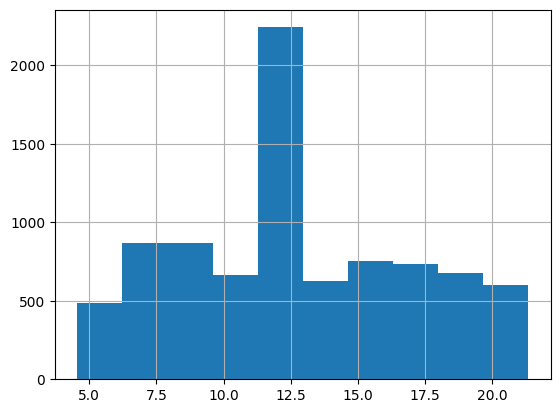

In [38]:
# Histogramas de caracteristicas del Dataset
df["Item_Weight"].hist();

<Axes: >

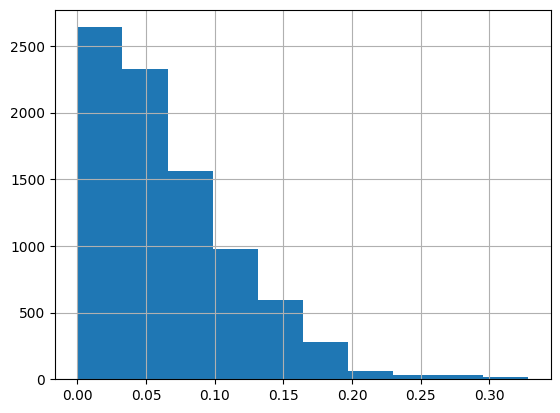

In [39]:
df["Item_Visibility"].hist()

<Axes: >

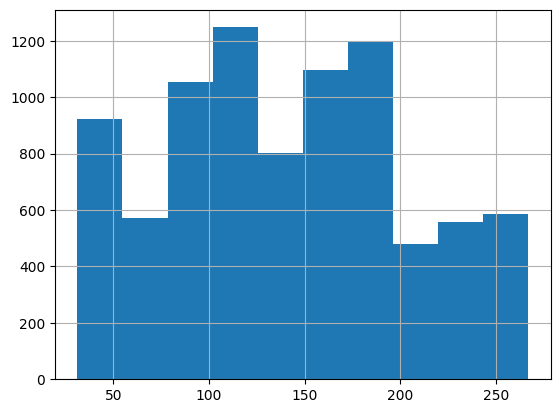

In [40]:
df["Item_MRP"].hist()

<Axes: >

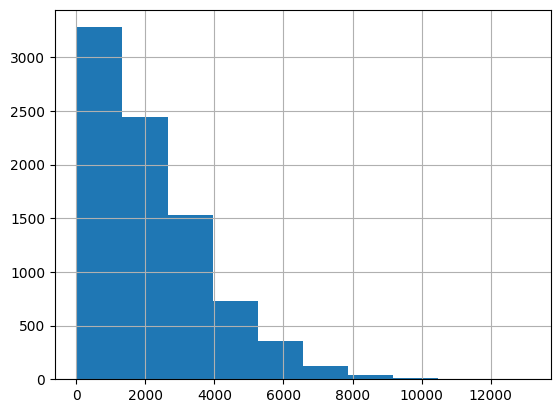

In [41]:
df["Item_Outlet_Sales"].hist()

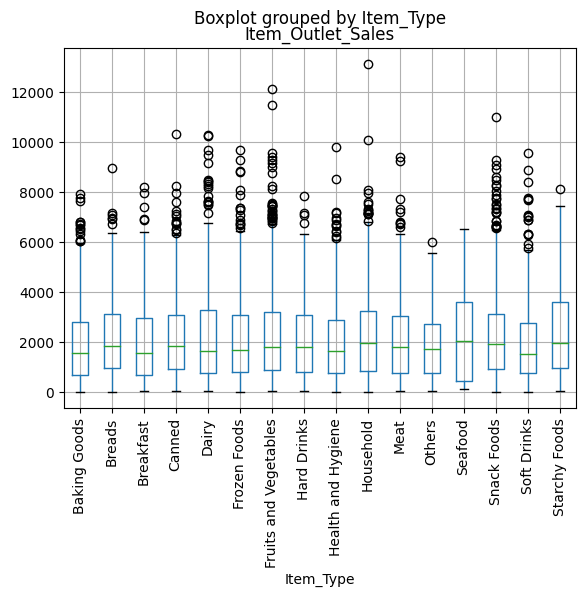

In [48]:
# Boxplot
df.boxplot(column = 'Item_Outlet_Sales', by = 'Item_Type'); #Item_Type
plt.xticks(rotation = 90);

In [43]:
# Mapa de calor de la correlación entre las características
df_caract = df[["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year","Item_Outlet_Sales"]]
df_corr = df_caract.corr()

<Axes: >

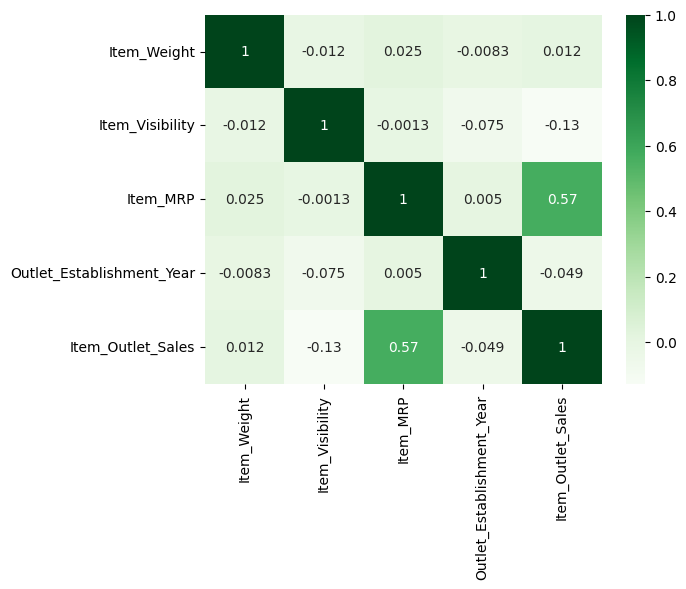

In [46]:
sns.heatmap(df_corr, cmap = "Greens", annot = True)

Podemos ver una clara relacion entre las caracteristicas de "Item_MRP" y "Item_Outlet_Sales" que aclaremos en profundidad mas adelante